In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

https://www.kaggle.com/footprintnetwork/national-footprint-accounts-2018 

https://www.footprintnetwork.org/resources/glossary/

In [125]:
sns.set_style('white')

df = pd.read_csv('NFA.CSV')
print(df.head(10))
#view our column names
df.columns

   country ISO alpha-3 code UN_region  UN_subregion  year           record  \
0  Armenia              ARM      Asia  Western Asia  1992     BiocapPerCap   
1  Armenia              ARM      Asia  Western Asia  1992     BiocapTotGHA   
2  Armenia              ARM      Asia  Western Asia  1992     EFConsPerCap   
3  Armenia              ARM      Asia  Western Asia  1992     EFConsTotGHA   
4  Armenia              ARM      Asia  Western Asia  1992  EFExportsPerCap   
5  Armenia              ARM      Asia  Western Asia  1992  EFExportsTotGHA   
6  Armenia              ARM      Asia  Western Asia  1992  EFImportsPerCap   
7  Armenia              ARM      Asia  Western Asia  1992  EFImportsTotGHA   
8  Armenia              ARM      Asia  Western Asia  1992     EFProdPerCap   
9  Armenia              ARM      Asia  Western Asia  1992     EFProdTotGHA   

      crop_land   grazing_land    forest_land  fishing_ground  built_up_land  \
0  1.611286e-01       0.135023       0.083836        0.013718

Index(['country', 'ISO alpha-3 code', 'UN_region', 'UN_subregion', 'year',
       'record', 'crop_land', 'grazing_land', 'forest_land', 'fishing_ground',
       'built_up_land', 'carbon', 'total', 'Percapita GDP (2010 USD)',
       'population'],
      dtype='object')

#### 1. Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

In [126]:
df_cntry = df.loc[
    ((df['ISO alpha-3 code'] == 'USA') | (df['ISO alpha-3 code'] == 'DEU')) & (df['record'] == 'EFConsPerCap'),
    ['crop_land', 'grazing_land', 'forest_land', 'fishing_ground',
       'built_up_land', 'carbon']
]

c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


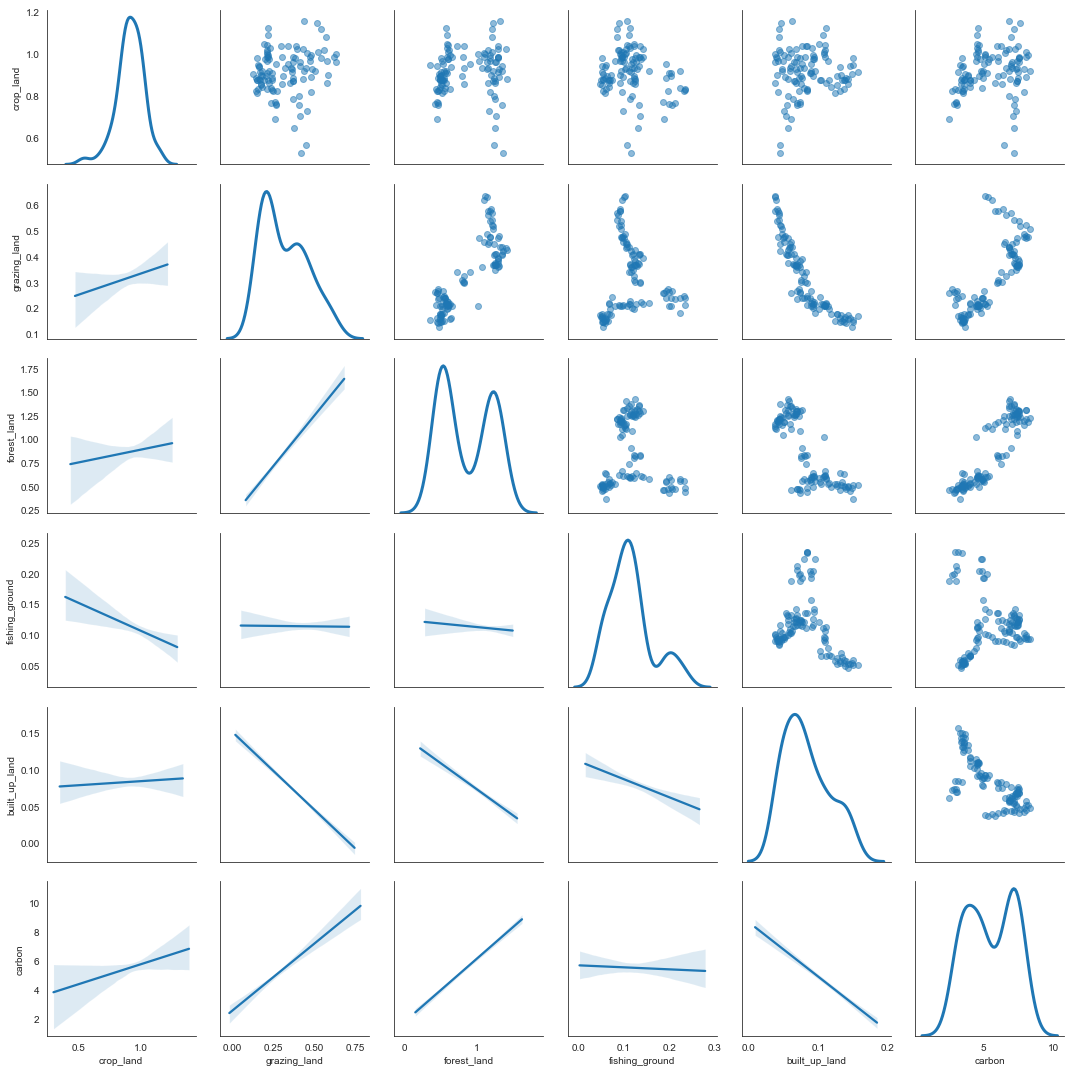

In [127]:
# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_cntry.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

                crop_land  grazing_land  forest_land  fishing_ground  \
crop_land        1.000000      0.131075     0.085122       -0.209853   
grazing_land     0.131075      1.000000     0.841165       -0.008657   
forest_land      0.085122      0.841165     1.000000       -0.084801   
fishing_ground  -0.209853     -0.008657    -0.084801        1.000000   
built_up_land    0.037478     -0.896889    -0.766221       -0.358142   
carbon           0.180833      0.760884     0.911394       -0.039234   

                built_up_land    carbon  
crop_land            0.037478  0.180833  
grazing_land        -0.896889  0.760884  
forest_land         -0.766221  0.911394  
fishing_ground      -0.358142 -0.039234  
built_up_land        1.000000 -0.729517  
carbon              -0.729517  1.000000  


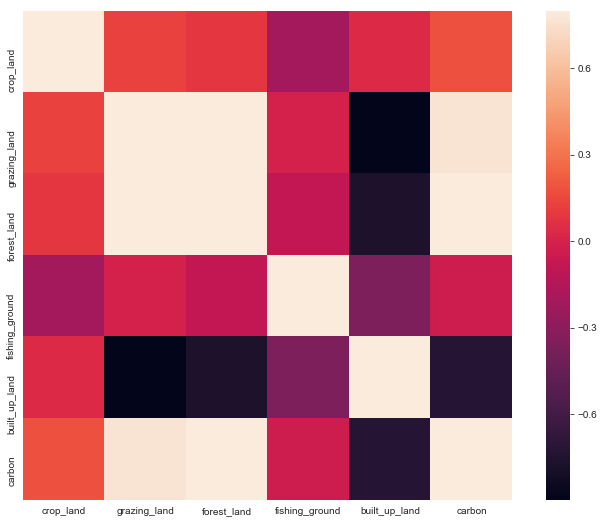

In [128]:
# Make the correlation matrix.
corrmat = df_cntry.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [129]:
df_attributes = df.loc[
    ((df['ISO alpha-3 code'] == 'USA') | (df['ISO alpha-3 code'] == 'DEU')) & (df['record'] == 'EFConsPerCap')
]

c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


ValueError: Neither the `x` nor `y` variable appears to be numeric.

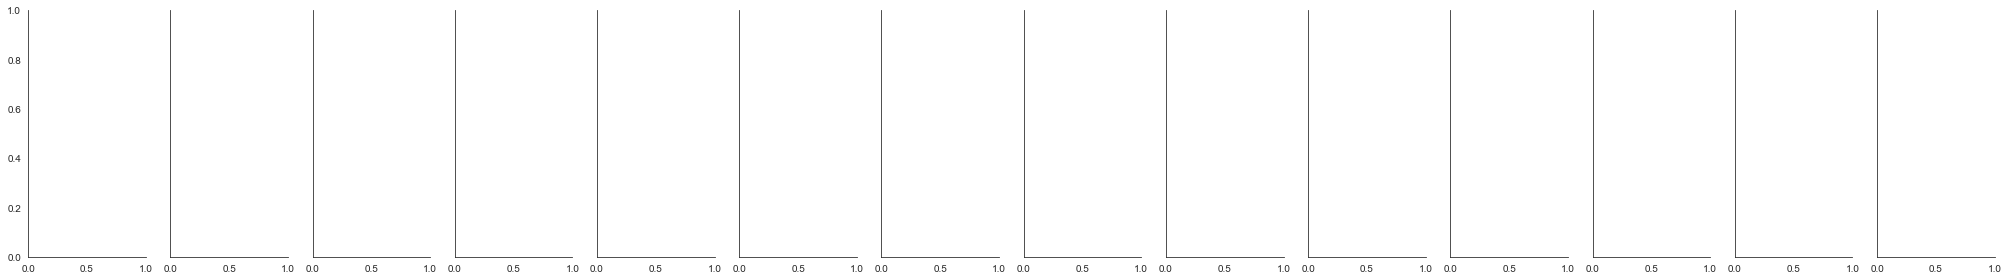

In [154]:
#error with facetgrid for boxplots 

# Plot all the variables with boxplots for each country.

# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
df_long = df_attributes
df_long = pd.melt(df_long, id_vars=['ISO alpha-3 code'])

g = sns.FacetGrid(df_long, col="variable", size=4, aspect=.5)
g = g.map(sns.boxplot, "ISO alpha-3 code", "value")
plt.show()

# Descriptive statistics by group.
print(df_cntry.groupby('ISO alpha-3 code').describe())

# Test whether group differences are significant.
for col in df_cntry.loc[:,'crop_land':'carbon'].columns:
    print(col)
    print(stats.ttest_ind(
        df_cntry[df_cntry['ISO alpha-3 code'] == 'USA'][col].dropna(),
        df_cntry[df_cntry['ISO alpha-3 code'] == 'DEU'][col].dropna()
    ))

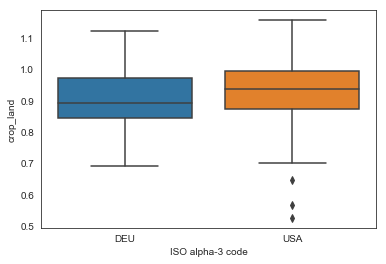

In [144]:
ax1 = sns.boxplot(x=df_attributes["ISO alpha-3 code"],y=df_attributes["crop_land"])

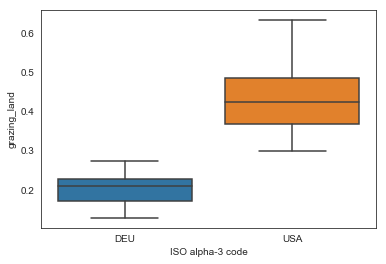

In [145]:
ax2 = sns.boxplot(x=df_attributes["ISO alpha-3 code"],y=df_attributes["grazing_land"])

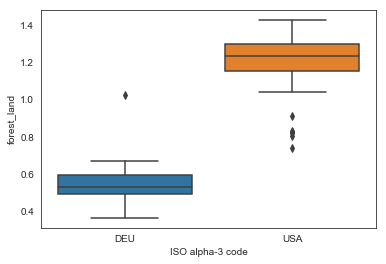

In [146]:
ax3 = sns.boxplot(x=df_attributes["ISO alpha-3 code"],y=df_attributes["forest_land"])

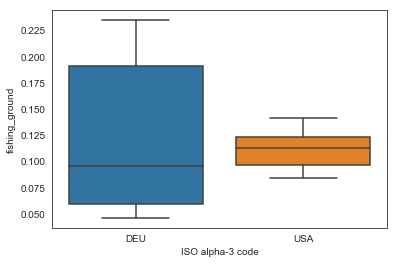

In [147]:
ax4 = sns.boxplot(x=df_attributes["ISO alpha-3 code"],y=df_attributes["fishing_ground"])

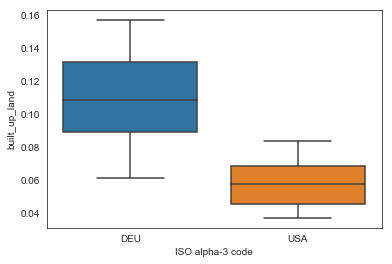

In [148]:
ax5 = sns.boxplot(x=df_attributes["ISO alpha-3 code"],y=df_attributes["built_up_land"])

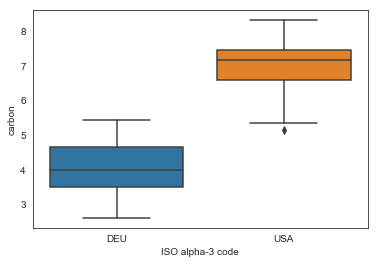

In [149]:
ax6 = sns.boxplot(x=df_attributes["ISO alpha-3 code"],y=df_attributes["carbon"])

In [153]:
print(df_attributes.groupby('ISO alpha-3 code').describe())

# Test whether group differences are significant.
for col in df_attributes.loc[:,'crop_land':'carbon'].columns:
    print(col)
    print(stats.ttest_ind(
        df_attributes[df_attributes['ISO alpha-3 code'] == 'USA'][col].dropna(),
        df_attributes[df_attributes['ISO alpha-3 code'] == 'DEU'][col].dropna()
    ))

                 Percapita GDP (2010 USD)                              \
                                    count          mean           std   
ISO alpha-3 code                                                        
DEU                                  45.0  32567.717778   7575.123268   
USA                                  54.0  34622.472222  10553.642567   

                                                                  \
                      min      25%       50%        75%      max   
ISO alpha-3 code                                                   
DEU               19624.8  26084.0  33742.20  38577.700  45022.6   
USA               17142.2  25632.6  34529.85  45053.725  50782.5   

                 built_up_land             ...        total             year  \
                         count      mean   ...          75%        max count   
ISO alpha-3 code                           ...                                 
DEU                       54.0  0.108593   ...     6.

Looks like crop_land and fishing_ground are not statistically different from one another 

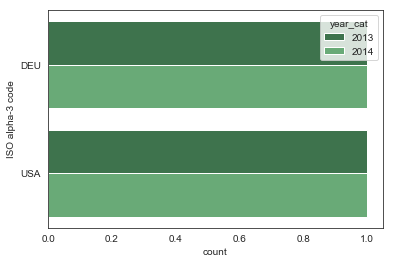

year_cat          2013  2014
ISO alpha-3 code            
DEU                  1     1
USA                  1     1
Power_divergenceResult(statistic=0.0, pvalue=1.0)


In [157]:
# Add a second categorical variable.
df_2cat = df.loc[
    ((df['ISO alpha-3 code'] == 'USA') | (df['ISO alpha-3 code'] == 'DEU')) & (df['record'] == 'EFConsPerCap'),
    ['ISO alpha-3 code', 'year']
]

# Create a text variable so that output is easier to interpret.
df_2cat['year_cat'] = None
df_2cat.loc[df_2cat['year'] == 2014, 'year_cat'] = '2014'
df_2cat.loc[df_2cat['year'] == 2013, 'year_cat'] = '2013'

# Plot counts for each combination of levels.
sns.countplot(y="ISO alpha-3 code", hue="year_cat", data=df_2cat, palette="Greens_d")
plt.show()

# Table of counts
counttable = pd.crosstab(df_2cat['ISO alpha-3 code'], df_2cat['year_cat'])
print(counttable)

# Test will return a chi-square test statistic and a p-value. Like the t-test,
# the chi-square is compared against a distribution (the chi-square
# distribution) to determine whether the group size differences are large
# enough to reflect differences in the population.
print(stats.chisquare(counttable, axis=None))

In [158]:
#is there another categorical variable we can make? This one is just telling us that data for 2013 and 2014 for both countries is available 

In [164]:
features = pd.get_dummies(df['ISO alpha-3 code'])

# Nordic countries dummy.
features['Nordic'] = np.where((df['ISO alpha-3 code'].isin(['SWE', 'NOR'])), 1, 0)

print(pd.crosstab(features['Nordic'], df['ISO alpha-3 code']))

ISO alpha-3 code  ABW  AFG  AGO  ALB  ARE  ARG  ARM  ATG  AUS  AUT ...   UZB  \
Nordic                                                             ...         
0                 290  540  540  540  350  540  230  350  540  540 ...   230   
1                   0    0    0    0    0    0    0    0    0    0 ...     0   

ISO alpha-3 code  VEN  VNM  VUT  WSM  YEM  YUG  ZAF  ZMB  ZWE  
Nordic                                                         
0                 540  540   10  540  540  310  540  510  540  
1                   0    0    0    0    0    0    0    0    0  

[2 rows x 193 columns]


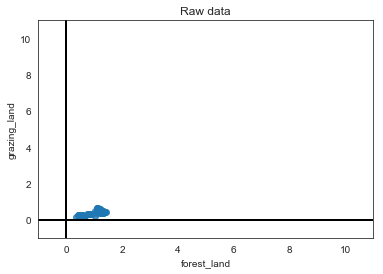

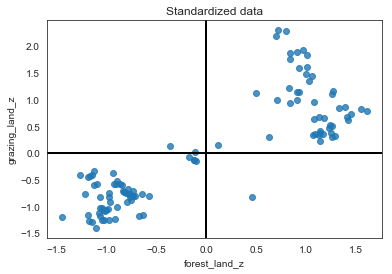

In [159]:
t = sns.regplot(
    'forest_land',
    'grazing_land',
    df_cntry,
    fit_reg=False
)
t.set(xlim=(-1, 11), ylim=(-1, 11))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

# Standardizing variables by subtracting the mean and dividing by the standard
# deviation. Now both variables are on the same scale.
df_cntry['forest_land_z'] = (df_cntry['forest_land'] - df_cntry['forest_land'].mean()) / df_cntry['forest_land'].std()
df_cntry['grazing_land_z'] = (df_cntry['grazing_land'] - df_cntry['grazing_land'].mean()) / df_cntry['grazing_land'].std()

t = sns.regplot(
    'forest_land_z',
    'grazing_land_z',
    df_cntry,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()


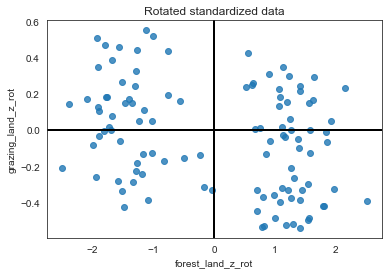

In [160]:
# Rotating the data so that the axes roughly match to vector above.
df_cntry['forest_land_z_rot'] = math.cos(40) * df_cntry['forest_land_z'] - math.sin(40) * df_cntry['forest_land_z']
df_cntry['grazing_land_z_rot'] = math.sin(40) * df_cntry['grazing_land_z'] + math.cos(40) * df_cntry['grazing_land_z']

t = sns.regplot(
    'forest_land_z_rot',
    'grazing_land_z_rot',
    df_cntry,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Rotated standardized data')
plt.show()


In [161]:
# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(df_cntry)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00934579  0.13230003  0.08591785 -0.21181416  0.03782827  0.18252331
   0.08591785  0.13230003 -0.08591785  0.13230003]
 [ 0.13230003  1.00934579  0.84902596 -0.00873791 -0.9052711   0.76799538
   0.84902596  1.00934579 -0.84902596  1.00934579]
 [ 0.08591785  0.84902596  1.00934579 -0.08559364 -0.7733824   0.91991172
   1.00934579  0.84902596 -1.00934579  0.84902596]
 [-0.21181416 -0.00873791 -0.08559364  1.00934579 -0.36148925 -0.03960104
  -0.08559364 -0.00873791  0.08559364 -0.00873791]
 [ 0.03782827 -0.9052711  -0.7733824  -0.36148925  1.00934579 -0.73633442
  -0.7733824  -0.9052711   0.7733824  -0.9052711 ]
 [ 0.18252331  0.76799538  0.91991172 -0.03960104 -0.73633442  1.00934579
   0.91991172  0.76799538 -0.91991172  0.76799538]
 [ 0.08591785  0.84902596  1.00934579 -0.08559364 -0.7733824   0.91991172
   1.00934579  0.84902596 -1.00934579  0.84902596]
 [ 0.13230003  1.00934579  0.84902596 -0.00873791 -0.9052711   0.76799538
   0.84902596  1.00934579 -0.84

In [162]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 10).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[-0.04614871]
 [-0.35856423]
 [-0.35932057]
 [ 0.00066989]
 [ 0.33377668]
 [-0.33678517]
 [-0.35932057]
 [-0.35856423]
 [ 0.35932057]
 [-0.35856423]]
Eigenvalue 1: 7.161569187186805
----------------------------------------
Eigenvector 2: 
[[-0.55783763]
 [ 0.0264011 ]
 [-0.07519575]
 [ 0.74192039]
 [-0.3321327 ]
 [-0.0948943 ]
 [-0.07519575]
 [ 0.0264011 ]
 [ 0.07519575]
 [ 0.0264011 ]]
Eigenvalue 2: 1.3605896645230229
----------------------------------------
Eigenvector 3: 
[[-0.80279902]
 [-0.0951935 ]
 [ 0.1683189 ]
 [-0.46256964]
 [ 0.16671675]
 [ 0.03961592]
 [ 0.1683189 ]
 [-0.0951935 ]
 [-0.1683189 ]
 [-0.0951935 ]]
Eigenvalue 3: 0.8634578158119296
----------------------------------------
Eigenvector 4: 
[[ 0.15062649]
 [-0.3736099 ]
 [ 0.27226957]
 [ 0.35362618]
 [ 0.13767933]
 [ 0.43835985]
 [ 0.27226957]
 [-0.3736099 ]
 [-0.27226957]
 [-0.3736099 ]]
Eigenvalue 4: 0.559283386418508
----------------------------------------
Eigenvector 5: 
[[-0.10320888]
 [-0.00

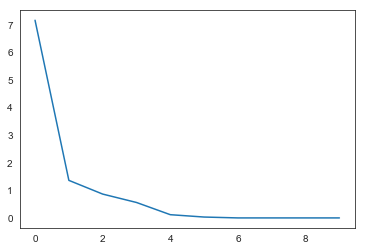

In [163]:
plt.plot(eig_val_cov)
plt.show()